In [2]:
import numpy as np
import matplotlib.pyplot as plt
from BubbleGraph import BubbleGraph
from reachable_BG import reachable
import time
from GUI import GUI

In [17]:
# nxn matrix with floor(n/2) rows as 0, and no 0's in top row
def get_rand_matrix(n):
    matrix = np.random.randint(1, 2, size=(1, n)) # all 1's in top row
    matrix = np.append(matrix, np.random.randint(0, 2, size=(int((n-1)/2), n)), axis=0) 
    matrix = np.append(matrix, np.zeros((int(n/2),n), dtype=int), axis=0)
    return matrix

In [3]:
get_rand_matrix(3)

array([[1, 1, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [4]:
bg = BubbleGraph(get_rand_matrix(3))
bg.print()

reach = reachable(bg)
for r in reach:
    bg[r[0]][r[1]] = 9

print('----------')
bg.print()
print(reach)

1 1 1 
 0 0 1 
0 0 0 
----------
1 1 1 
 9 9 1 
0 0 9 
{(1, 0), (1, 1), (2, 2)}


In [82]:
bg = BubbleGraph(get_rand_matrix(5))
bg.print()

reach = reachable(bg, use_memo=True)
reach2 = reachable(bg)
assert reach == reach2
for r in reach:
    bg[r[0]][r[1]] = 9

print('----------')
bg.print()
print(reach)

1 1 1 1 1 
 0 1 0 0 0 
0 1 0 1 0 
 0 0 0 0 0 
0 0 0 0 0 
----------
1 1 1 1 1 
 0 1 9 0 9 
9 1 9 1 9 
 9 9 9 9 0 
0 0 0 0 0 
{(1, 2), (3, 2), (3, 3), (3, 0), (3, 1), (1, 4), (2, 0), (2, 2), (2, 4)}


In [372]:
times = []
times2 = []
for n in range(3,101):
    curr_time = []
    curr_time2 = []
    for i in range(50):
        bg = BubbleGraph(get_rand_matrix(n))
        start = time.time()
        reach = reachable(bg, use_memo=True)
        end = time.time() - start
        curr_time.append(end)
        start2 = time.time()
        reach2 = reachable(bg)
        end2 = time.time() - start2
        curr_time2.append(end2)
    avg_time = sum(curr_time) / len(curr_time)
    avg_time2 = sum(curr_time2) / len(curr_time2)
    print(avg_time, avg_time2)
    times.append(avg_time)
    times2.append(avg_time2)

0.0001920318603515625 0.0001497364044189453
0.00038503170013427736 0.0003761434555053711
0.00027120590209960937 0.00025848865509033205
0.0004308605194091797 0.00043049335479736326
0.0004906272888183594 0.00048460006713867186
0.0007997179031372071 0.0007242727279663086
0.0008321809768676758 0.0008274555206298828
0.001095423698425293 0.0011137962341308595
0.001424269676208496 0.0013955497741699218
0.001541438102722168 0.0015548276901245117
0.002015705108642578 0.0020162200927734374
0.002466311454772949 0.0024492740631103516
0.002252936363220215 0.0022032546997070314
0.0027303171157836916 0.0028325796127319338
0.003494434356689453 0.003674201965332031
0.003405642509460449 0.0035584497451782225
0.003684849739074707 0.0038095664978027343
0.004057345390319825 0.0042973852157592776
0.004402947425842285 0.004341158866882324
0.005313186645507812 0.0053493261337280275
0.005224723815917969 0.005224943161010742
0.005845179557800293 0.005950102806091309
0.00611567497253418 0.00618255615234375
0.006

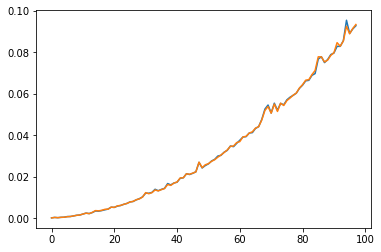

In [373]:
plt.plot(times)
plt.plot(times2)

In [374]:
def reachable_time(bg: BubbleGraph, use_memo=False):
    if use_memo:
        memo = np.zeros((bg.n_rows, bg.n_cols), dtype=bool)

    ret = set()
    start = time.time_ns() 
    for col in range(bg.n_cols):
        # Traverse top right
        j = col
        for i in range(bg.n_rows - 1, -1, -1):
            if not use_memo:
                if bg[i][j] == 0:
                    if bg.adjacent((i, j)):
                        ret.add((i, j))
                else:
                    break
            else:
                if bg[i][j] == 0:
                    if not memo[i][j]:
                        memo[i][j] = True
                        if bg.adjacent((i, j)):
                            ret.add((i, j))
                else:
                    break

            if i % 2 == 1:
                j += 1
            if j == bg.n_cols:
                break

        # Traverse top left
        k = col
        for i in range(bg.n_rows - 1, -1, -1):
            if not use_memo: 
                if bg[i][k] == 0:
                    if bg.adjacent((i, k)):
                        ret.add((i, k))
                else:
                    break
            else:
                if bg[i][k] == 0:
                    if not memo[i][k]:
                        memo[i][k] = True
                        if bg.adjacent((i, k)):
                            ret.add((i, k))
                else:
                    break

            if i % 2 == 0:
                k -= 1
            if k < 0:
                break
        end = (time.time_ns() - start) / (10 ** 9)
    return end

In [375]:
bg = BubbleGraph(get_rand_matrix(5))
reachable_time(bg)

0.000277

In [432]:
times = []
times2 = []
for n in range(3,100):
    curr_time = []
    curr_time2 = []
    for i in range(50):
        bg = BubbleGraph(get_rand_matrix(n))
        curr_time.append(reachable_time(bg))
        curr_time2.append(reachable_time(bg, use_memo=True))
    avg_time = sum(curr_time) / len(curr_time)
    avg_time2 = sum(curr_time2) / len(curr_time2)
    print(avg_time, avg_time2)
    times.append(avg_time)
    times2.append(avg_time2)

0.00012416000000000003 7.334e-05
0.00023584000000000007 0.00016463999999999997
0.00025274 0.00017154000000000003
0.00042251999999999996 0.00027932
0.0004942000000000002 0.00033428
0.00068408 0.00046730000000000003
0.0011359999999999999 0.0006829200000000001
0.0010920600000000002 0.00075808
0.0012585399999999996 0.0008302199999999997
0.0015937599999999996 0.0010998199999999998
0.0016387999999999997 0.00109176
0.0021092000000000003 0.0014142399999999998
0.0022477600000000006 0.0014679400000000003
0.0039030800000000006 0.00282198
0.0028227199999999995 0.0019179600000000002
0.0035861 0.0023202800000000005
0.00379588 0.0025457400000000003
0.004055839999999999 0.00273842
0.00436418 0.002964959999999999
0.004969460000000001 0.003339780000000001
0.005134540000000001 0.00353198
0.00580018 0.0038377600000000013
0.00622954 0.00412826
0.006863379999999998 0.004700839999999999
0.0078912 0.00512512
0.008172779999999998 0.0052663799999999985
0.008095819999999998 0.005400420000000001
0.008967299999999

runtime reduced by factor of 1.5

In [446]:
factors = []
for i in range(len(times)):
    factors.append(times[i] / times2[i])
sum(factors)/len(factors)

1.5142503140442864

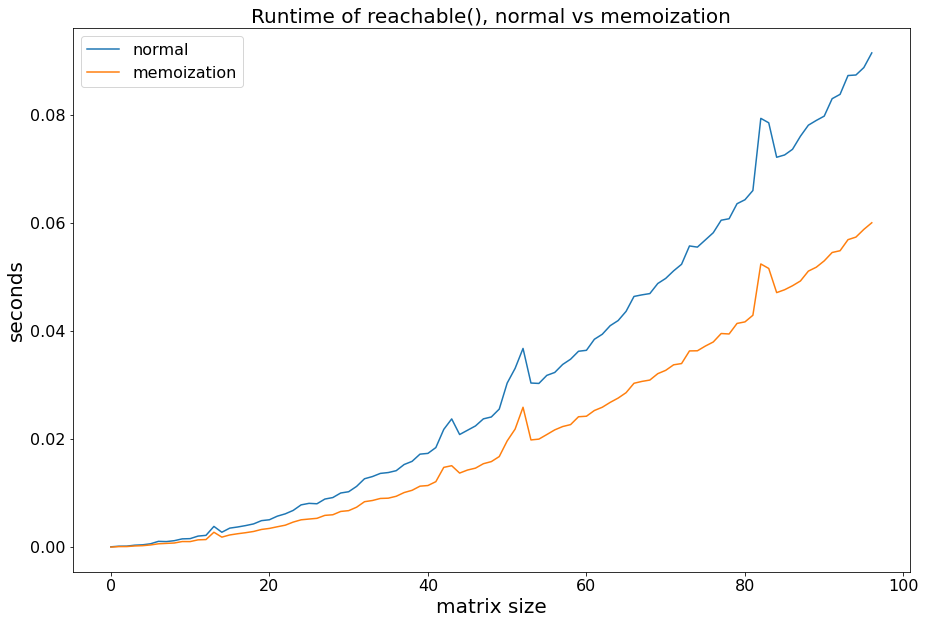

In [597]:
plt.figure(figsize=(15,10))
plt.plot(times)
plt.plot(times2)
plt.xlabel('matrix size', fontsize=20)
plt.ylabel('seconds', fontsize=20)
plt.title('Runtime of reachable(), normal vs memoization', fontsize=20)
plt.legend(['normal', 'memoization'], fontsize=16)
plt.tick_params(labelsize=16)
# plt.savefig('reachable_runtime.png', format='png', dpi=400)

## finding the number of bubbles reached

In [450]:
def count_zeros(bg):
    return (bg.n_rows * bg.n_cols) - np.sum(bg.matrix)

In [568]:
all_reached_ratio = []
for n in range(3,100):
    curr_reached = []
    for _ in range(20):
        bg = BubbleGraph(get_rand_matrix(n))
        zeros = count_zeros(bg)
        reached = len(reachable(bg))
        curr_reached.append(reached/zeros)
    avg = sum(curr_reached)/len(curr_reached)
    print(avg)
    all_reached_ratio.append(avg)

0.805
0.47348484848484845
0.4898349869944297
0.3459843228430185
0.34636057892056343
0.2945608202809914
0.2820686721213558
0.2425013359685808
0.23467605041331557
0.21227080591470937
0.20043371541919036
0.1767411843470674
0.17933952937882663
0.15479469935717136
0.15294005503663544
0.13596550473348518
0.1356935076507642
0.12345147640118956
0.1202219759613586
0.113536450571912
0.10957589303016735
0.10113774843490934
0.10137150630211
0.09490025969183478
0.09601126654990763
0.08969191125558792
0.08426214589792452
0.08422685143934353
0.08518292902663518
0.07794760330686747
0.07615020093258208
0.07388945435480451
0.07318361308300604
0.06704731441451982
0.06935369922387576
0.06816874767819077
0.06435122723669925
0.06341493575012964
0.061589987500872724
0.06023245515563236
0.05399441326586344
0.05543260127199386
0.054816892106646885
0.053776794243937706
0.05288857065114565
0.05234429590435004
0.05212782060255518
0.050393408033046164
0.049547527596627824
0.04801460258444563
0.04696452371742521
0.

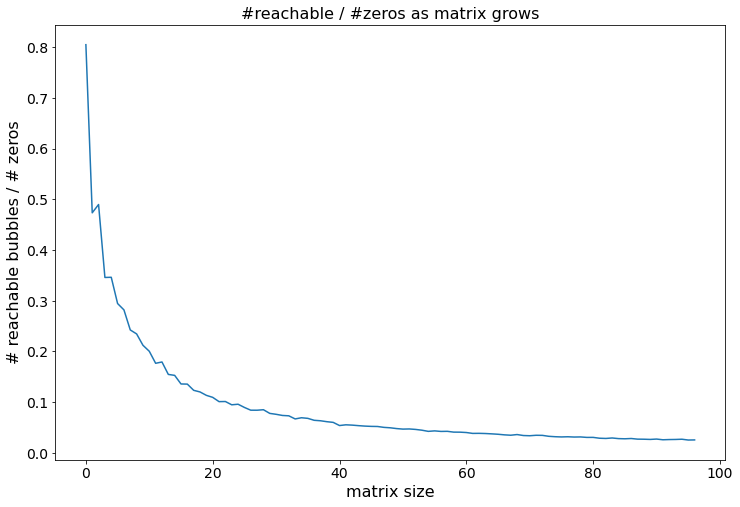

In [591]:
plt.figure(figsize=(12,8))
plt.plot(all_reached_ratio)
plt.xlabel('matrix size', fontsize=16)
plt.ylabel('# reachable bubbles / # zeros', fontsize=16)
plt.title('#reachable / #zeros as matrix grows', fontsize=16)
plt.tick_params(labelsize=14)
# plt.savefig('reachable_ratio.png', format='png', dpi=400)

In [575]:
all_reached = []
for n in range(3,100):
    curr_reached = []
    for _ in range(20):
        bg = BubbleGraph(get_rand_matrix(n))
        zeros = count_zeros(bg)
#         zeros = n**2
        reached = len(reachable(bg))
#         curr_reached.append(reached/zeros)
        curr_reached.append(reached)
    avg = sum(curr_reached)/len(curr_reached)
    print(avg)
    all_reached.append(avg)

3.5
4.75
7.25
9.0
11.05
12.65
14.9
17.5
20.1
21.75
20.85
24.15
29.5
29.3
30.7
31.9
34.2
35.45
38.9
39.35
40.0
42.95
46.4
45.2
49.7
49.35
51.9
53.65
55.8
57.7
61.1
63.35
65.1
65.95
67.0
71.9
70.8
75.75
73.2
80.0
80.15
79.5
83.35
84.8
85.0
89.55
90.45
95.6
93.7
97.55
103.15
96.0
99.9
105.2
105.65
105.2
107.65
112.25
113.95
115.6
113.9
117.3
118.75
121.8
122.25
123.35
126.95
129.95
136.5
133.0
135.0
136.3
141.45
142.85
143.4
144.6
145.0
146.4
151.65
152.75
156.4
153.05
156.05
158.5
159.35
165.6
168.7
167.15
163.2
174.05
173.45
178.05
180.45
173.25
174.7
179.3
179.45


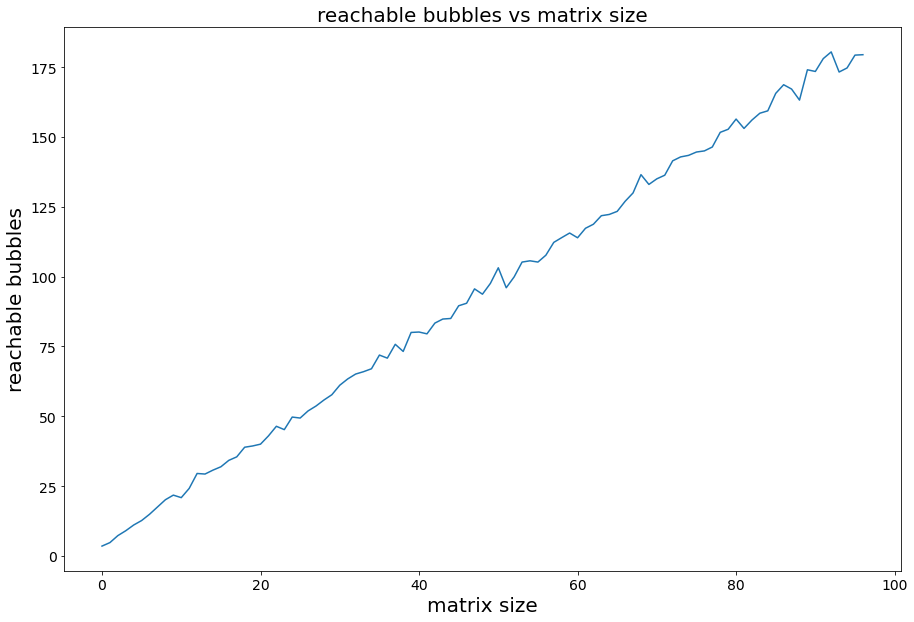

In [593]:
plt.figure(figsize=(15,10))
plt.plot(all_reached)
plt.xlabel('matrix size', fontsize=20)
plt.ylabel('reachable bubbles', fontsize=20)
plt.title('reachable bubbles vs matrix size', fontsize=20)
plt.tick_params(labelsize=14)
# plt.savefig('reachable_count.png', format='png', dpi=400)

## gui usage

[[2 2 5 ... 4 1 4]
 [3 5 2 ... 2 4 2]
 [4 2 4 ... 5 4 5]
 ...
 [1 1 4 ... 3 4 4]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


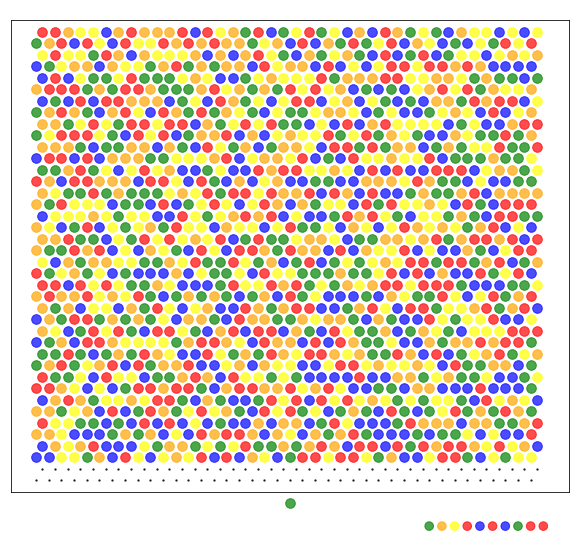

In [3]:
GUI.test()

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 0 1 0 0 1 0 1 2 1]
 [0 0 1 0 1 0 0 1 1 0 0 2 0]
 [1 1 1 1 1 1 1 1 0 1 2 0 0]
 [1 1 1 1 2 1 2 1 1 1 2 1 2]
 [1 1 1 1 2 2 2 1 2 2 1 2 0]
 [2 2 1 2 1 2 2 1 2 2 1 2 1]
 [0 2 2 2 2 0 2 2 0 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


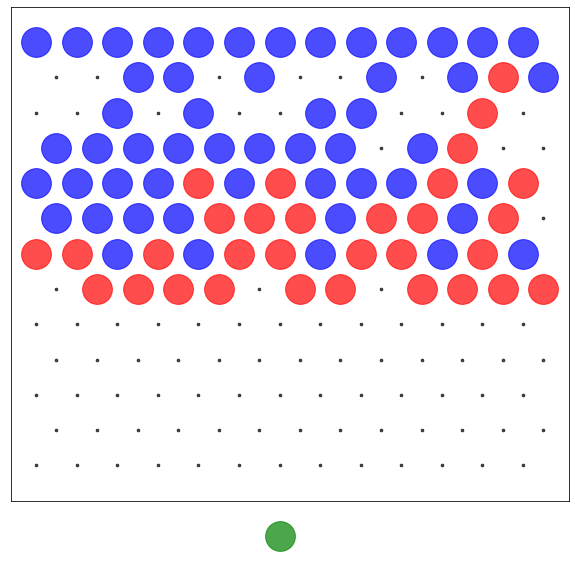

In [29]:
# matrix = BubbleGraph.random_graph(15,15,5,7).matrix
matrix = get_rand_matrix(13)
bg = BubbleGraph(matrix)
reach = reachable(bg)
for r in reach:
    bg[r[0]][r[1]] = 2
queue = []
active_bubble = 3
print(matrix)
gui = GUI()
gui.load_matrix(matrix)
gui.load_bubble(active_bubble)
gui.load_queue(queue)
gui.show()